In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
import import_ipynb
#import Scaling_methods as scaling

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

matplotlib.rc('axes', titlesize=14)
matplotlib.rc('xtick', labelsize=14)     
matplotlib.rc('ytick', labelsize=20)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
         'axes.labelsize': 16,
         'axes.titlesize':16,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
pylab.rcParams.update(params)

In [3]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

matplotlib.rc('axes', titlesize=12)
matplotlib.rc('xtick', labelsize=12)     
matplotlib.rc('ytick', labelsize=12)

In [4]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
         'axes.labelsize': 14,
         'axes.titlesize':15,
         'xtick.labelsize':11,
         'ytick.labelsize':11}
pylab.rcParams.update(params)

In [5]:
#features used
index = ['u (m/s)', 'T (K)', 'H2', 'H', 'O', 'O2', 'OH',
       'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO',
       'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3',
       'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2',
       'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN',
       'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO',
       'CH3CHO']
# target
target_name = ['Tin']

index_importance = ['H2O', 'T (K)', 'O2','CO', 'CO2', 'OH', 'N2', 'CH4', 'H2', 'u (m/s)', 'H', 'O', 'C2H2', 'NO', 'HCN', 'CH3', 'CH2O', 'NH3', 'C2H6', 'HCCOH']
len(index_importance)

20

In [6]:
Y_pf = pd.read_csv("Y_pf.csv", sep=',', names = index) #shape: (26000, 55)
Y_pf_importance = Y_pf[index_importance]
Y_pf_importance.head()

,H2O,T (K),O2,CO,CO2,OH,N2,CH4,H2,u (m/s),H,O,C2H2,NO,HCN,CH3,CH2O,NH3,C2H6,HCCOH
0,0.000045,500.21,0.179020,0.000004,8.385000e-08,2.368200e-14,0.67349,1.432100e-01,0.004240,0.242230,2.773300e-15,4.230100e-17,1.869300e-08,3.873400e-11,7.800700e-11,8.267600e-10,2.433400e-08,5.612700e-10,1.005300e-08,1.058200e-12
1,0.162760,2267.90,0.000013,0.098650,3.061500e-02,8.173000e-04,0.60834,2.503800e-06,0.095451,3.789800,3.115600e-03,1.830100e-05,7.377400e-06,1.704400e-04,3.864700e-05,1.474700e-06,6.649600e-08,3.217500e-06,1.564700e-12,1.944800e-08
2,0.117940,1817.40,0.078818,0.000220,5.890800e-02,1.170300e-03,0.74271,4.836700e-19,0.000089,1.386100,1.263900e-05,1.308700e-04,1.082300e-24,4.823300e-06,1.311700e-14,1.371000e-18,6.005600e-15,3.710000e-12,0.000000e+00,9.567900e-25
3,0.027333,554.13,0.180600,0.002370,4.609100e-03,3.219000e-09,0.74618,3.782300e-02,0.000807,0.089593,3.398100e-11,1.818100e-11,3.164500e-07,4.254800e-09,5.116800e-10,7.888700e-08,1.720200e-04,9.063000e-11,3.140400e-05,4.651300e-10
4,0.160870,2287.00,0.013655,0.044335,5.404600e-02,1.313800e-02,0.67396,4.058600e-15,0.023245,8.021700,1.201100e-02,4.659300e-03,8.407400e-17,7.504600e-05,3.186000e-09,1.513200e-14,3.163000e-10,4.254000e-10,2.446600e-26,1.181400e-18


In [7]:
X_pf = pd.read_csv("X.csv", sep=',', names = ['unknown_1', 'unknown_2', 'Tin']) #shape: (25999, 3) 
X_pf.head()


,unknown_1,unknown_2,Tin
0,0.011614,0.085258,500
1,0.017166,0.085258,900
2,0.018035,0.033771,500
3,0.013240,0.028302,300
4,0.014744,0.060219,900


In [8]:
# Features
#df = new_labels  #shape:
df = Y_pf         #shape:

# target
#target = labels['Tin']  #shape:
target = X_pf['Tin']     #shape:

In [9]:
df_with_target = pd.concat([Y_pf, target],axis=1)

In [10]:
Y_pf_sampled = df_with_target.loc[df_with_target['Tin'] == 300]
Y_pf_sampled.head()
X_sampled = Y_pf_sampled.drop(['Tin'], axis =1)

In [11]:
X_pf_sampled = X_pf.loc[X_pf['Tin'] == 300 ]
X_pf_sampled['unknown_2'].unique()

array([0.028302, 0.049815, 0.060219, 0.055046, 0.033771, 0.080357,
       0.070397, 0.075404, 0.065336, 0.085258, 0.039179, 0.044527,
       0.090106])

In [12]:
class RangeScaler():
    def __init__(self):
        return None

    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        Z = X/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z
    
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])        
        sd[sd == 0] = m
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = X_center/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z

In [13]:
range_scaler = RangeScaler()
X_range_scaled = range_scaler.fit_transform(X_sampled)

In [14]:
X_range_scaled.shape

(6500, 55)

In [15]:
df_scaled = pd.DataFrame(X_range_scaled, columns=index)

In [16]:
# Create an instance for KMeans
kmeans = KMeans(n_clusters=10,  random_state=0)
kmeans.fit(df_scaled)
df_labels = pd.DataFrame(kmeans.labels_+1, columns=['kmeans_idx'])
kmeans_labels = pd.concat([df_scaled, df_labels], axis=1)
kmeans_labels.shape
df_labels.kmeans_idx.value_counts()
kmeans_labels.head()
kmeans_labels.shape
df_labels.head()

,kmeans_idx
0,1
1,9
2,6
3,1
4,1


kmeans_clusters_idx = ['cluster_'+str(k+1) for k in range(6)]
for k in range(1,6):
    kmeans_clusters_idx[k] = kmeans_labels.loc[kmeans_labels['kmeans_idx'] == k] 
kmeans_clusters_idx[0].head(10)

In [17]:
pca_range = PCA(n_components=None)

pca_range.fit(X_range_scaled)

x_pca_range = pca_range.transform(X_range_scaled)

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

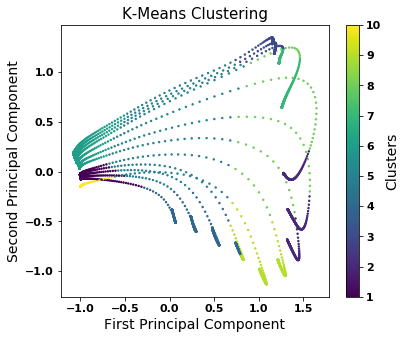

In [18]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

surf1 = ax1.scatter(x_pca_range[:,0], x_pca_range[:,1],c=df_labels['kmeans_idx'], s= 2)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('K-Means Clustering')
fig.colorbar(surf1,label='Clusters', ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\K-Means_clustering_10.pdf')

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

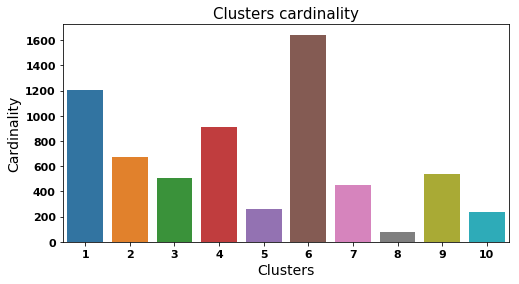

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(data=kmeans_labels, x='kmeans_idx')
plt.title('Clusters cardinality')
plt.ylabel('Cardinality')
plt.xlabel('Clusters')
plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\K-Means_cardinality_10.pdf')


In [23]:
sum_square = {}
# Let's test for K from 1 to 10, 
# we can use range() function in the for loop here! 
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    # .inertia: Computing Sum of Squared Distances 
    # of samples to their closest cluster center.
    sum_square[k] = kmeans.inertia_ 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

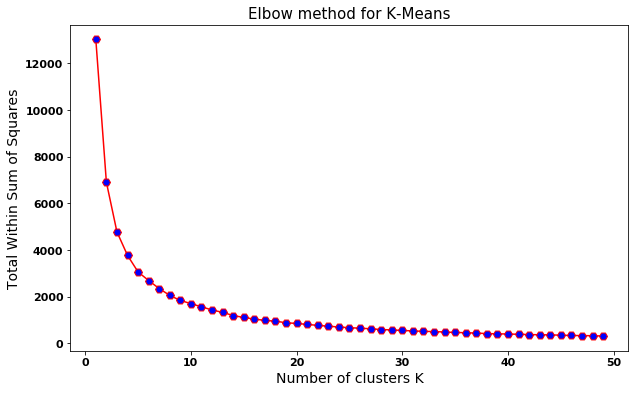

In [25]:
plt.figure(figsize=(10,6))
plt.plot(list(sum_square.keys()),
         list(sum_square.values()),
         
         # Some figure aesthetics
         linestyle='-', # '-' for Continuous line 
         marker='H', # 'H' for Hexagons 
         color='r', # 'g' for green color
         markersize = 8, # size of the masker
         markerfacecolor='b') # 'b' for blue color
plt.title('Elbow method for K-Means')
plt.xlabel('Number of clusters K')
plt.ylabel('Total Within Sum of Squares')
plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\K-Means_elbow.pdf')
#plt.close()

In [ ]:
Y_pf_sampled = Y_pf_sampled.reset_index(drop=True)

In [ ]:
Y_pf_sampled_labeled = pd.concat([Y_pf_sampled, df_labels], axis=1) 

In [ ]:
Y_pf_sampled_labeled.head()

# Knowledge Extraction

In [ ]:


#kmeans_labels_ratio = pd.concat([Y_pf_sampled_ratio.reset_index(drop=True), df_labels_ratio], axis=1)
kmeans_clusters_idx = ['cluster_'+str(k+1) for k in range(6)]
#kmeans_clusters_idx_ratio_T = ['cluster_'+str(k+1) for k in range(10)]
l = []
feature = 'H2'
Y_pf_sampled_labeled = pd.concat([Y_pf_sampled, df_labels], axis=1) 
Y_pf_sampled_labeled.head()
for k in range(1,6):
    
    kmeans_clusters_idx[k] = Y_pf_sampled_labeled.loc[Y_pf_sampled_labeled['kmeans_idx'] == k] 
    kmeans_clusters_idx[k]['average'] = kmeans_clusters_idx[k][feature].mean()
    #kmeans_clusters_idx_ratio_T[k] = kmeans_clusters_idx_ratio[k]
    #kmeans_clusters_idx_ratio_T[k]['average'] = kmeans_clusters_idx_ratio_T[k]['T (K)'].mean()
    l.append(kmeans_clusters_idx[k][feature].mean())
    
#kmeans_clusters_idx[0].head(10)
print(l)

In [ ]:
# Create the dictionary 
#event_dictionary ={0 : l[0], 1 : l[1], 2 : l[2], 3 : l[3], 4 : l[4], 5 : l[5], 6 : l[6], 7 : l[7], 8 : l[8], 9 : l[9]} 
#event_dictionary ={1 : l[1], 2 : l[2], 3 : l[3], 4 : l[4], 5 : l[5]} 
event_dictionary ={0 : l[0], 1 : l[1], 2 : l[2], 3 : l[3], 4 : l[4]}
# Add a new column named 'Price' 
Y_pf_sampled_labeled['average'] = (Y_pf_sampled_labeled['kmeans_idx']-1).map(event_dictionary)
#Y_pf_sampled_labeled['average'] = Y_pf_sampled_labeled['idx'].map()
Y_pf_sampled_labeled['kmeans_idx'].unique()

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

surf1 = ax1.scatter(x_pca_range[:,0],x_pca_range[:,1],c=Y_pf_sampled_labeled['average'] , s= 2)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('K-Means Clustering')
fig.colorbar(surf1,label=feature, ticks=l)
plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\importance\Kmeans_H2.pdf')

In [ ]:

plt.figure(figsize=(20,12))

#plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\K-Means_cardinality_5.pdf')

kmeans_clusters_idx[4].drop(['kmeans_idx'], axis = 1).mean()[index_importance].plot(kind='bar')
plt.title('Clusters cardinality')
plt.ylabel('Cardinality')
plt.xlabel('Features')

In [ ]:
Y_pf_sampled_ratio = pd.concat([X_sampled, X_pf_sampled['unknown_2']], axis=1) 
#Y_pf_sampled, X_pf_sampled['unknown_2']
0.070397
Y_pf_sampled_ratio = Y_pf_sampled_ratio.loc[Y_pf_sampled_ratio['unknown_2'] == 0.070397]
Y_pf_sampled_ratio = Y_pf_sampled_ratio.drop(['unknown_2'], axis =1)
Y_pf_sampled_ratio.head()

In [ ]:
range_scaler_ratio = RangeScaler()
X_range_scaled_ratio = range_scaler_ratio.fit_transform(Y_pf_sampled_ratio)

In [ ]:
df_scaled_ratio = pd.DataFrame(X_range_scaled_ratio, columns=index)
kmeans = KMeans(n_clusters=5,  random_state=0)
kmeans.fit(df_scaled_ratio)
df_labels_ratio = pd.DataFrame(kmeans.labels_, columns=['kmeans_idx'])
kmeans_labels_ratio = pd.concat([df_scaled_ratio, df_labels_ratio], axis=1)
kmeans_labels.shape
df_labels.kmeans_idx.value_counts()
kmeans_labels.head()
kmeans_labels.shape
kmeans.labels_

In [ ]:
pca_range_ratio = PCA(n_components=None)

pca_range_ratio.fit(X_range_scaled_ratio)

x_pca_range_ratio = pca_range_ratio.transform(X_range_scaled_ratio)

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

surf1 = ax1.scatter(x_pca_range_ratio[:,0], x_pca_range_ratio[:,1],c=df_labels_ratio['kmeans_idx'], s= 2)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('K-Means Clustering')
fig.colorbar(surf1,label='Clusters')
#plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\K-Means_clustering_10.pdf')

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=kmeans_labels_ratio, x='kmeans_idx')
plt.title('Clusters cardinality')
plt.ylabel('Cardinality')
plt.xlabel('Clusters')
#plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\K-Means_cardinality_5.pdf')

In [ ]:
kmeans_labels_ratio = pd.concat([Y_pf_sampled_ratio.reset_index(drop=True), df_labels_ratio], axis=1)
kmeans_clusters_idx_ratio = ['cluster_'+str(k+1) for k in range(10)]
kmeans_clusters_idx_ratio_T = ['cluster_'+str(k+1) for k in range(10)]
l = []
for k in range(10):
    kmeans_clusters_idx_ratio[k] = kmeans_labels_ratio.loc[kmeans_labels_ratio['kmeans_idx'] == k] 
    kmeans_clusters_idx_ratio_T[k] = kmeans_clusters_idx_ratio[k]
    kmeans_clusters_idx_ratio_T[k]['average'] = kmeans_clusters_idx_ratio_T[k]['T (K)'].mean()
    l.append(kmeans_clusters_idx_ratio[k]['u (m/s)'].median())
    
kmeans_clusters_idx_ratio[1].head(10)
#kmeans_clusters_idx_ratio_T[k]['T (K)'].mean()


In [ ]:
l

In [ ]:
kmeans_labels_ratio = pd.concat([Y_pf_sampled_ratio.reset_index(drop=True), df_labels_ratio], axis=1)
kmeans_labels_ratio.head()

In [ ]:
for k in range(10):
    #if kmeans_labels_ratio['kmeans_idx'] == k:
        #kmeans_labels_ratio['average'] =  l[k]
    for x in kmeans_labels_ratio['kmeans_idx']:
        if x == k:
            kmeans_labels_ratio['average'] = l[x]
        
    #kmeans_labels_ratio['average'] = [l[k] if x == k:  for x in kmeans_labels_ratio['kmeans_idx']]
kmeans_labels_ratio['average'].unique()

In [ ]:
# Create the dictionary 
event_dictionary ={0 : l[0], 1 : l[1], 2 : l[2], 3 : l[3], 4 : l[4], 5 : l[5], 6 : l[6], 7 : l[7], 8 : l[8], 9 : l[9]} 
  
# Add a new column named 'Price' 
kmeans_labels_ratio['average'] = kmeans_labels_ratio['kmeans_idx'].map(event_dictionary)
kmeans_labels_ratio['average'].unique()

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

surf1 = ax1.scatter(x_pca_range_ratio[:,0], x_pca_range_ratio[:,1],c=kmeans_labels_ratio['average'], s= 2)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('K-Means Clustering')
fig.colorbar(surf1,label='Clusters')
#plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\K-Means_clustering_10.pdf')

In [ ]:
kmeans_labels_ratio = pd.concat([Y_pf_sampled_ratio.reset_index(drop=True), df_labels_ratio], axis=1)

plt.figure(figsize=(20,12))

#plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\K-Means_cardinality_5.pdf')

kmeans_clusters_idx_ratio[2].drop(['kmeans_idx', 'T (K)'], axis = 1).mean()[index_importance].plot(kind='bar')
plt.title('Clusters cardinality')
plt.ylabel('Cardinality')
plt.xlabel('Features')

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [ ]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

X= Y_pf_sampled_labeled.drop(['kmeans_idx','Tin'], axis =1) # Features
y = Y_pf_sampled_labeled['kmeans_idx'] # Labels

#X= df_scaled # Features
#y=df_labels  # Labels
#X = kmeans_labels_ratio.drop(['kmeans_idx'], axis =1)
#y = kmeans_labels_ratio['kmeans_idx'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
y.unique()
Y_pf_sampled_labeled.head()

In [ ]:

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=index).sort_values(ascending=False)
feature_imp*100

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot

# Add labels to your graph
plt.figure(figsize=(26,8))
sns.barplot(y=feature_imp, x=feature_imp.index)
plt.ylabel('Feature Importance Score',fontsize=22)
plt.xlabel('Features', fontsize=22)
plt.title("Visualizing Important Features", fontsize=22)
plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\importance\feature_importance_kmeans.pdf')
#plt.legend()
plt.show()

# PCA for each Cluster

In [ ]:
kmeans_clusters_idx = ['cluster_'+str(k+1) for k in range(10)]
for k in range(1, 6):
    kmeans_clusters_idx[k] = kmeans_labels.loc[kmeans_labels['kmeans_idx'] == k] 
kmeans_clusters_idx[3].head()

In [ ]:
class VastScaler():
    def __init__(self):
        return None
        
    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])        
        sd[sd == 0] = m
        Z = (X/sd)*(X_mean/sd)
        return Z
    
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])        
        sd[sd == 0] = m
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = (X_center/sd)*(X_mean/sd)
        return Z
    
class ParetoScaler():
    
    def __init__(self):
        return None
    
    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])        
        sd[sd == 0] = m
        Z = X/np.sqrt(sd)
        return Z
            
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])        
        sd[sd == 0] = m
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = X_center/np.sqrt(sd)
        return Z

In [ ]:
def get_clustered_pcs(X, idx):
    scaler = RangeScaler()
    X_sd_scaled  = scaler.fit_transform(X[idx].drop('kmeans_idx', axis=1)) 
    
    #X_sd_scaled = X[idx].drop('idx', axis=1)
    ncomps = 2
    #PCA with StandardScaler scaling: centring and scaling 
    pca_sd = PCA()
    pca_sd.fit(X_sd_scaled)
    x_pca_sd = pca_sd.transform(X_sd_scaled)
    return x_pca_sd[:,0], x_pca_sd[:,1], X_sd_scaled, pca_sd.components_

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

x1= get_clustered_pcs(kmeans_clusters_idx, 4)[0],
y1= get_clustered_pcs(kmeans_clusters_idx, 4)[1],

surf1 = ax1.scatter(x1, y1, s= 2)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('K-Means Clustering')
#fig.colorbar(surf1,label='Clusters')

In [ ]:
index_name = ['PCA_'+str(k) for k in range(1, len(index)+1)]
#df_scaled = pd.DataFrame(X_range_scaled, columns=index)
z1 = get_clustered_pcs(kmeans_clusters_idx, 5)[2]
z1 = pd.DataFrame(z, columns=index)
z1 = z1.iloc[:, :]
z2 = get_clustered_pcs(kmeans_clusters_idx, 5)[3]
arr_sd = pd.DataFrame(np.round(z2, 4), columns=z1.columns, index=index_name)[index_importance].T
arr_sd.T.head()

In [ ]:
bar = arr_sd[index_name[:3]][:].plot(kind='bar', figsize=(16, 6))
bar.set_xlabel('Features')
bar.set_ylabel('PCs weights')

In [ ]:
#plt.figure(figsize=(12,6))
#kmeans_clusters_idx[1].plot(kind='barh')
#kmeans_clusters_idx[1].value_counts().plot(ax=ax, kind='bar')

In [ ]:
bar = kmeans_clusters_idx[1][index[:3]][:3].plot(kind='bar', figsize=(20, 8))
bar.set_xlabel('Features')
bar.set_ylabel('PCA')
bar.set_title('Scores for the last  3 components with all features')

In [ ]:
kmeans_clusters_idx[3].nunique().plot(kind='bar', figsize=(20, 8))

In [28]:
WCSS_array=np.array([])
for K in range(1,6):
    kmeans=KMeans(df_scaled,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

NameError: name 'n_iter' is not defined

In [ ]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso




In [ ]:
#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

y = kmeans_clusters_idx[7]['']
X = kmeans_clusters_idx[7].drop('u (m/s)',1)
y.head()


In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
imp_coef.plot(kind = "bar")
plt.title("Feature importance using Lasso Model")


In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
clustering = SpectralClustering(n_clusters=10,assign_labels="discretize",random_state=0).fit(df_scaled)


In [ ]:
clustering.labels_
df_labels = pd.DataFrame(clustering.labels_, columns=['kmeans_idx'])
kmeans_labels = pd.concat([df_scaled, df_labels], axis=1)

In [ ]:
pca_range = PCA(n_components=None)

pca_range.fit(X_range_scaled)

x_pca_range = pca_range.transform(X_range_scaled)

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 8))

surf1 = ax1.scatter(x_pca_range[:,0], x_pca_range[:,1],c=df_labels['kmeans_idx'])
ax1.set_xlabel('First principal component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('StandardScaler scaling: centring and scaling')
fig.colorbar(surf1,label='kmeans_idx')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering = AgglomerativeClustering(n_clusters=10).fit(df_scaled)
clustering.labels_

In [ ]:
clustering.labels_
df_labels = pd.DataFrame(clustering.labels_, columns=['kmeans_idx'])
kmeans_labels = pd.concat([df_scaled, df_labels], axis=1)

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 8))

surf1 = ax1.scatter(x_pca_range[:,0], x_pca_range[:,1],c=df_labels['kmeans_idx'])
ax1.set_xlabel('First principal component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('StandardScaler scaling: centring and scaling')
fig.colorbar(surf1,label='kmeans_idx')

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=0.600).fit(df_scaled)
clustering.labels_


In [ ]:
clustering.labels_
df_labels = pd.DataFrame(clustering.labels_, columns=['kmeans_idx'])
kmeans_labels = pd.concat([df_scaled, df_labels], axis=1)

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 8))

surf1 = ax1.scatter(x_pca_range[:,0], x_pca_range[:,1],c=df_labels['kmeans_idx'], s=2)
ax1.set_xlabel('First principal component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('StandardScaler scaling: centring and scaling')
fig.colorbar(surf1,label='kmeans_idx')